# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file
df=pd.read_parquet('2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA-trip_records')


# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_dh = pd.read_parquet(file_path)

        df_dh['date']=df_dh['tpep_pickup_datetime'].dt.date
        df_dh['hour']=df_dh['tpep_pickup_datetime'].dt.hour



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_dh['date'].unique():
            daily_date = df_dh[df_dh['date'] == date]



            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_date[daily_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sample=hour_data.sample(frac=0.0075, random_state=42)
                sampled_data = pd.concat([sampled_data, sample])

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [11]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
634          2  2023-08-01 00:49:20   2023-08-01 01:32:38              1.0   
687          2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
1093         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
584          2  2023-08-01 00:21:31   2023-08-01 00:52:42              1.0   
1018         2  2023-08-01 00:01:27   2023-08-01 00:21:55              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
634           21.39         2.0                  N           132   
687            3.67         1.0                  N           137   
1093           3.20         1.0                  N           100   
584           17.80         2.0                  N           132   
1018           7.53         1.0                  N           236   

      DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
634            142             1  ...      0.5       11.00          0.00   
687             75             1  ...      0.5        4.26          0.00   
1093           236             1  ...      0.5        5.30          0.00   
584            237             1  ...      0.5       16.46          6.55   
1018            78             2  ...      0.5        0.00          0.00   

      improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
634                     1.0         86.75                   2.5         1.75   
687                     1.0         25.56                   2.5         0.00   
1093                    1.0         26.60                   2.5         0.00   
584                     1.0         98.76                   2.5         1.75   
1018                    1.0         37.40                   2.5         0.00   

            date  hour airport_fee  
634   2023-08-01     0         NaN  
687   2023-08-01     0         NaN  
1093  2023-08-01     0         NaN  
584   2023-08-01     0         NaN  
1018  2023-08-01     0         NaN  

[5 rows x 22 columns]

In [12]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('df',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file
df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
634             2  2023-08-01 00:49:20   2023-08-01 01:32:38              1.0   
687             2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
1093            1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
584             2  2023-08-01 00:21:31   2023-08-01 00:52:42              1.0   
1018            2  2023-08-01 00:01:27   2023-08-01 00:21:55              1.0   
...           ...                  ...                   ...              ...   
3366373         1  2023-10-31 23:00:53   2023-10-31 23:28:09              1.0   
3364422         1  2023-10-31 23:57:52   2023-11-01 00:05:24              1.0   
3364877         2  2023-10-31 23:44:38   2023-11-01 00:02:33              2.0   
3366653         2  2023-10-31 23:00:07   2023-10-31 23:17:52              1.0   
3363918         1  2023-10-31 23:28:33   2023-10-31 23:44:11              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
634              21.39         2.0                  N           132   
687               3.67         1.0                  N           137   
1093              3.20         1.0                  N           100   
584              17.80         2.0                  N           132   
1018              7.53         1.0                  N           236   
...                ...         ...                ...           ...   
3366373           3.20         1.0                  N           100   
3364422           1.30         1.0                  N           113   
3364877           3.08         1.0                  N           234   
3366653           5.29         1.0                  N            79   
3363918           2.40         1.0                  N           161   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
634               142             1  ...      0.5       11.00          0.00   
687                75             1  ...      0.5        4.26          0.00   
1093              236             1  ...      0.5        5.30          0.00   
584               237             1  ...      0.5       16.46          6.55   
1018               78             2  ...      0.5        0.00          0.00   
...               ...           ...  ...      ...         ...           ...   
3366373           141             1  ...      0.5        6.90          0.00   
3364422           170             1  ...      0.5        3.00          0.00   
3364877            87             1  ...      0.5        4.68          0.00   
3366653            33             1  ...      0.5        4.35          0.00   
3363918            79             1  ...      0.5        4.25          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
634                        1.0         86.75                   2.5   
687                        1.0         25.56                   2.5   
1093                       1.0         26.60                   2.5   
584                        1.0         98.76                   2.5   
1018                       1.0         37.40                   2.5   
...                        ...           ...                   ...   
3366373                    1.0         34.50                   2.5   
3364422                    1.0         18.00                   2.5   
3364877                    1.0         28.08                   2.5   
3366653                    1.0         33.35                   2.5   
3363918                    1.0         25.55                   2.5   

         Airport_fee        date  hour airport_fee  
634             1.75  2023-08-01     0         NaN  
687             0.00  2023-08-01     0         NaN  
1093            0.00  2023-08-01     0         NaN  
584             1.75  2023-08-01     0         NaN  
1018            0.00  2023-08-01     0         NaN  
...              ...         ...   ...         ...  
3366373         0.00  

In [14]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
634          2  2023-08-01 00:49:20   2023-08-01 01:32:38              1.0   
687          2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
1093         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
584          2  2023-08-01 00:21:31   2023-08-01 00:52:42              1.0   
1018         2  2023-08-01 00:01:27   2023-08-01 00:21:55              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
634           21.39         2.0                  N           132   
687            3.67         1.0                  N           137   
1093           3.20         1.0                  N           100   
584           17.80         2.0                  N           132   
1018           7.53         1.0                  N           236   

      DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
634            142             1  ...      0.5       11.00          0.00   
687             75             1  ...      0.5        4.26          0.00   
1093           236             1  ...      0.5        5.30          0.00   
584            237             1  ...      0.5       16.46          6.55   
1018            78             2  ...      0.5        0.00          0.00   

      improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
634                     1.0         86.75                   2.5         1.75   
687                     1.0         25.56                   2.5         0.00   
1093                    1.0         26.60                   2.5         0.00   
584                     1.0         98.76                   2.5         1.75   
1018                    1.0         37.40                   2.5         0.00   

            date  hour airport_fee  
634   2023-08-01     0         NaN  
687   2023-08-01     0         NaN  
1093  2023-08-01     0         NaN  
584   2023-08-01     0         NaN  
1018  2023-08-01     0         NaN  

[5 rows x 22 columns]

In [15]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265495 entries, 634 to 3363918
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265495 non-null  int64         
 1   tpep_pickup_datetime   265495 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265495 non-null  datetime64[us]
 3   passenger_count        256683 non-null  float64       
 4   trip_distance          265495 non-null  float64       
 5   RatecodeID             256683 non-null  float64       
 6   store_and_fwd_flag     256683 non-null  object        
 7   PULocationID           265495 non-null  int64         
 8   DOLocationID           265495 non-null  int64         
 9   payment_type           265495 non-null  int64         
 10  fare_amount            265495 non-null  float64       
 11  extra                  265495 non-null  float64       
 12  mta_tax                265495 non-null  float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df=df.reset_index().drop('index',axis=1)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 00:49:20   2023-08-01 01:32:38              1.0   
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
3         2  2023-08-01 00:21:31   2023-08-01 00:52:42              1.0   
4         2  2023-08-01 00:01:27   2023-08-01 00:21:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          21.39         2.0                  N           132           142   
1           3.67         1.0                  N           137            75   
2           3.20         1.0                  N           100           236   
3          17.80         2.0                  N           132           237   
4           7.53         1.0                  N           236            78   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       11.00          0.00   
1             1  ...      0.5        4.26          0.00   
2             1  ...      0.5        5.30          0.00   
3             1  ...      0.5       16.46          6.55   
4             2  ...      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         86.75                   2.5         1.75   
1                    1.0         25.56                   2.5         0.00   
2                    1.0         26.60                   2.5         0.00   
3                    1.0         98.76                   2.5         1.75   
4                    1.0         37.40                   2.5         0.00   

         date  hour airport_fee  
0  2023-08-01     0         NaN  
1  2023-08-01     0         NaN  
2  2023-08-01     0         NaN  
3  2023-08-01     0         NaN  
4  2023-08-01     0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
df['airport_fee']=df['airport_fee'].fillna(df['Airport_fee'])
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-01 00:49:20   2023-08-01 01:32:38              1.0   
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
3         2  2023-08-01 00:21:31   2023-08-01 00:52:42              1.0   
4         2  2023-08-01 00:01:27   2023-08-01 00:21:55              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          21.39         2.0                  N           132           142   
1           3.67         1.0                  N           137            75   
2           3.20         1.0                  N           100           236   
3          17.80         2.0                  N           132           237   
4           7.53         1.0                  N           236            78   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       11.00          0.00   
1             1  ...      0.5        4.26          0.00   
2             1  ...      0.5        5.30          0.00   
3             1  ...      0.5       16.46          6.55   
4             2  ...      0.5        0.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         86.75                   2.5         1.75   
1                    1.0         25.56                   2.5         0.00   
2                    1.0         26.60                   2.5         0.00   
3                    1.0         98.76                   2.5         1.75   
4                    1.0         37.40                   2.5         0.00   

         date  hour airport_fee  
0  2023-08-01     0        1.75  
1  2023-08-01     0        0.00  
2  2023-08-01     0        0.00  
3  2023-08-01     0        1.75  
4  2023-08-01     0        0.00  

[5 rows x 22 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
df1=df[df['fare_amount']<0]
df1.shape

(2593, 22)

In [19]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155         2  2023-08-01 10:56:50   2023-08-01 10:57:39              3.0   
281         2  2023-08-01 13:15:25   2023-08-01 13:20:11              2.0   
394         2  2023-08-01 16:12:41   2023-08-01 16:12:49              4.0   
571         2  2023-08-01 19:06:00   2023-08-01 19:11:12              2.0   
673         2  2023-08-01 22:24:48   2023-08-01 22:25:21              2.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
155           0.00         2.0                  N           186           186   
281           0.80         1.0                  N           238            24   
394           0.02         2.0                  N            42            42   
571           0.78         1.0                  N           236           236   
673           0.03         1.0                  N           231           231   

     payment_type  ...  mta_tax  tip_amount  tolls_amount  \
155             2  ...     -0.5         0.0           0.0   
281             2  ...     -0.5         0.0           0.0   
394             4  ...     -0.5         0.0           0.0   
571             2  ...     -0.5         0.0           0.0   
673             4  ...     -0.5         0.0           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
155                   -1.0         -74.0                  -2.5          0.0   
281                   -1.0         -11.2                  -2.5          0.0   
394                   -1.0         -76.5                   0.0          0.0   
571                   -1.0         -13.7                  -2.5          0.0   
673                   -1.0          -8.0                  -2.5          0.0   

           date  hour airport_fee  
155  2023-08-01    10         0.0  
281  2023-08-01    13         0.0  
394  2023-08-01    16         0.0  
571  2023-08-01    19         0.0  
673  2023-08-01    22         0.0  

[5 rows x 22 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [20]:
# Analyse RatecodeID for the negative fare amounts
RatecodeID_analyse=df['RatecodeID'].value_counts()
RatecodeID_analyse

RatecodeID
1.0     242268
2.0      10084
5.0       1479
99.0      1455
3.0        889
4.0        506
6.0          2
Name: count, dtype: int64

In [21]:
# Find which columns have negative values
negative_counts=(df.select_dtypes(include=['number'])<0).sum()
negative_counts




VendorID                    0
passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount              2593
extra                    1314
mta_tax                  2501
tip_amount                 13
tolls_amount              167
improvement_surcharge    2568
total_amount             2570
congestion_surcharge     2068
Airport_fee               314
hour                        0
airport_fee               341
dtype: int64

In [22]:
# fix these negative values
negative_cols=negative_counts[negative_counts>0].index
cols_to_fix=negative_cols.intersection(df1.columns)
for col in cols_to_fix:
   df1.loc[df1[col]<0,col]=df1.loc[df1[col]<0,col].abs()
df1.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155         2  2023-08-01 10:56:50   2023-08-01 10:57:39              3.0   
281         2  2023-08-01 13:15:25   2023-08-01 13:20:11              2.0   
394         2  2023-08-01 16:12:41   2023-08-01 16:12:49              4.0   
571         2  2023-08-01 19:06:00   2023-08-01 19:11:12              2.0   
673         2  2023-08-01 22:24:48   2023-08-01 22:25:21              2.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
155           0.00         2.0                  N           186           186   
281           0.80         1.0                  N           238            24   
394           0.02         2.0                  N            42            42   
571           0.78         1.0                  N           236           236   
673           0.03         1.0                  N           231           231   

     payment_type  ...  mta_tax  tip_amount  tolls_amount  \
155             2  ...      0.5         0.0           0.0   
281             2  ...      0.5         0.0           0.0   
394             4  ...      0.5         0.0           0.0   
571             2  ...      0.5         0.0           0.0   
673             4  ...      0.5         0.0           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
155                    1.0          74.0                   2.5          0.0   
281                    1.0          11.2                   2.5          0.0   
394                    1.0          76.5                   0.0          0.0   
571                    1.0          13.7                   2.5          0.0   
673                    1.0           8.0                   2.5          0.0   

           date  hour airport_fee  
155  2023-08-01    10         0.0  
281  2023-08-01    13         0.0  
394  2023-08-01    16         0.0  
571  2023-08-01    19         0.0  
673  2023-08-01    22         0.0  

[5 rows x 22 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column
df1.isnull().mean()*100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          1.542615
trip_distance            0.000000
RatecodeID               1.542615
store_and_fwd_flag       1.542615
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     1.542615
Airport_fee              8.870035
date                     0.000000
hour                     0.000000
airport_fee              1.542615
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [24]:
# Display the rows with null values
# Impute NaN values in 'passenger_count

In [25]:
df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
27             2  2023-08-01 05:04:55   2023-08-01 05:40:09              NaN   
34             1  2023-08-01 06:11:33   2023-08-01 06:30:38              NaN   
44             2  2023-08-01 07:22:26   2023-08-01 07:50:28              NaN   
103            1  2023-08-01 09:14:48   2023-08-01 09:28:41              NaN   
107            2  2023-08-01 09:45:22   2023-08-01 09:57:47              NaN   
...          ...                  ...                   ...              ...   
265392         2  2023-10-31 21:53:51   2023-10-31 22:00:20              NaN   
265393         1  2023-10-31 21:58:05   2023-10-31 22:13:04              NaN   
265417         1  2023-10-31 21:14:25   2023-10-31 21:49:42              NaN   
265425         2  2023-10-31 21:30:00   2023-10-31 21:54:00              NaN   
265480         1  2023-10-31 23:27:21   2023-10-31 23:27:49              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
27              19.58         NaN               None           141   
34               0.00         NaN               None           238   
44              10.80         NaN               None            50   
103              0.00         NaN               None             4   
107              3.61         NaN               None            79   
...               ...         ...                ...           ...   
265392           0.97         NaN               None           236   
265393           0.00         NaN               None           162   
265417           0.00         NaN               None           249   
265425           5.54         NaN               None           249   
265480           0.00         NaN               None           164   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
27                 1             0  ...      0.0       16.40         18.25   
34               138             0  ...      0.5        7.58          6.55   
44               138             0  ...      0.5        0.00          6.55   
103              261             0  ...      0.5        0.00          0.00   
107               12             0  ...      0.5        0.00          0.00   
...              ...           ...  ...      ...         ...           ...   
265392           262             0  ...      0.5        3.18          0.00   
265393            90             0  ...      0.5        0.00          0.00   
265417           230             0  ...      0.5        0.00          0.00   
265425           166             0  ...      0.5        5.83          0.00   
265480           170             0  ...      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
27                        1.0        100.05                   NaN   
34                        1.0         65.13                   NaN   
44                        1.0         52.82                   NaN   
103                       1.0         25.93                   NaN   
107                       1.0         19.68                   NaN   
...                       ...           ...                   ...   
265392                    1.0         19.06                   NaN   
265393                    1.0         17.92                   NaN   
265417                    1.0         29.71                   NaN   
265425                    1.0         34.97                   NaN   
265480                    1.0         18.70                   NaN   

        Airport_fee        date  hour airport_fee  
27              NaN  2023-08-01     5         NaN  
34              NaN  2023-08-01     6         NaN  
44              NaN  2023-08-01     7         NaN  
103             NaN  2023-08-01     9         NaN  
107             NaN  2023-08-01     9         NaN  
...             ...         ...   ...         ...  
265392          NaN  2023-10-31    21         NaN  
265393          NaN  202

In [26]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

In [27]:
df['passenger_count'].isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [28]:
(df['passenger_count']==0).sum()

4013

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [29]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
27             2  2023-08-01 05:04:55   2023-08-01 05:40:09              1.0   
34             1  2023-08-01 06:11:33   2023-08-01 06:30:38              1.0   
44             2  2023-08-01 07:22:26   2023-08-01 07:50:28              1.0   
103            1  2023-08-01 09:14:48   2023-08-01 09:28:41              1.0   
107            2  2023-08-01 09:45:22   2023-08-01 09:57:47              1.0   
...          ...                  ...                   ...              ...   
265392         2  2023-10-31 21:53:51   2023-10-31 22:00:20              1.0   
265393         1  2023-10-31 21:58:05   2023-10-31 22:13:04              1.0   
265417         1  2023-10-31 21:14:25   2023-10-31 21:49:42              1.0   
265425         2  2023-10-31 21:30:00   2023-10-31 21:54:00              1.0   
265480         1  2023-10-31 23:27:21   2023-10-31 23:27:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
27              19.58         NaN               None           141   
34               0.00         NaN               None           238   
44              10.80         NaN               None            50   
103              0.00         NaN               None             4   
107              3.61         NaN               None            79   
...               ...         ...                ...           ...   
265392           0.97         NaN               None           236   
265393           0.00         NaN               None           162   
265417           0.00         NaN               None           249   
265425           5.54         NaN               None           249   
265480           0.00         NaN               None           164   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
27                 1             0  ...      0.0       16.40         18.25   
34               138             0  ...      0.5        7.58          6.55   
44               138             0  ...      0.5        0.00          6.55   
103              261             0  ...      0.5        0.00          0.00   
107               12             0  ...      0.5        0.00          0.00   
...              ...           ...  ...      ...         ...           ...   
265392           262             0  ...      0.5        3.18          0.00   
265393            90             0  ...      0.5        0.00          0.00   
265417           230             0  ...      0.5        0.00          0.00   
265425           166             0  ...      0.5        5.83          0.00   
265480           170             0  ...      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
27                        1.0        100.05                   NaN   
34                        1.0         65.13                   NaN   
44                        1.0         52.82                   NaN   
103                       1.0         25.93                   NaN   
107                       1.0         19.68                   NaN   
...                       ...           ...                   ...   
265392                    1.0         19.06                   NaN   
265393                    1.0         17.92                   NaN   
265417                    1.0         29.71                   NaN   
265425                    1.0         34.97                   NaN   
265480                    1.0         18.70                   NaN   

        Airport_fee        date  hour airport_fee  
27              NaN  2023-08-01     5         NaN  
34              NaN  2023-08-01     6         NaN  
44              NaN  2023-08-01     7         NaN  
103             NaN  2023-08-01     9         NaN  
107             NaN  2023-08-01     9         NaN  
...             ...         ...   ...         ...  
265392          NaN  2023-10-31    21         NaN  
265393          NaN  202

In [30]:
df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True)

In [31]:
df['RatecodeID'].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [32]:
# handle null values in congestion_surcharge
df[df['congestion_surcharge'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
27             2  2023-08-01 05:04:55   2023-08-01 05:40:09              1.0   
34             1  2023-08-01 06:11:33   2023-08-01 06:30:38              1.0   
44             2  2023-08-01 07:22:26   2023-08-01 07:50:28              1.0   
103            1  2023-08-01 09:14:48   2023-08-01 09:28:41              1.0   
107            2  2023-08-01 09:45:22   2023-08-01 09:57:47              1.0   
...          ...                  ...                   ...              ...   
265392         2  2023-10-31 21:53:51   2023-10-31 22:00:20              1.0   
265393         1  2023-10-31 21:58:05   2023-10-31 22:13:04              1.0   
265417         1  2023-10-31 21:14:25   2023-10-31 21:49:42              1.0   
265425         2  2023-10-31 21:30:00   2023-10-31 21:54:00              1.0   
265480         1  2023-10-31 23:27:21   2023-10-31 23:27:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
27              19.58         1.0               None           141   
34               0.00         1.0               None           238   
44              10.80         1.0               None            50   
103              0.00         1.0               None             4   
107              3.61         1.0               None            79   
...               ...         ...                ...           ...   
265392           0.97         1.0               None           236   
265393           0.00         1.0               None           162   
265417           0.00         1.0               None           249   
265425           5.54         1.0               None           249   
265480           0.00         1.0               None           164   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
27                 1             0  ...      0.0       16.40         18.25   
34               138             0  ...      0.5        7.58          6.55   
44               138             0  ...      0.5        0.00          6.55   
103              261             0  ...      0.5        0.00          0.00   
107               12             0  ...      0.5        0.00          0.00   
...              ...           ...  ...      ...         ...           ...   
265392           262             0  ...      0.5        3.18          0.00   
265393            90             0  ...      0.5        0.00          0.00   
265417           230             0  ...      0.5        0.00          0.00   
265425           166             0  ...      0.5        5.83          0.00   
265480           170             0  ...      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
27                        1.0        100.05                   NaN   
34                        1.0         65.13                   NaN   
44                        1.0         52.82                   NaN   
103                       1.0         25.93                   NaN   
107                       1.0         19.68                   NaN   
...                       ...           ...                   ...   
265392                    1.0         19.06                   NaN   
265393                    1.0         17.92                   NaN   
265417                    1.0         29.71                   NaN   
265425                    1.0         34.97                   NaN   
265480                    1.0         18.70                   NaN   

        Airport_fee        date  hour airport_fee  
27              NaN  2023-08-01     5         NaN  
34              NaN  2023-08-01     6         NaN  
44              NaN  2023-08-01     7         NaN  
103             NaN  2023-08-01     9         NaN  
107             NaN  2023-08-01     9         NaN  
...             ...         ...   ...         ...  
265392          NaN  2023-10-31    21         NaN  
265393          NaN  202

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [33]:
# Handle any remaining missing values
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0],inplace=True)


In [34]:
df.congestion_surcharge.isnull().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

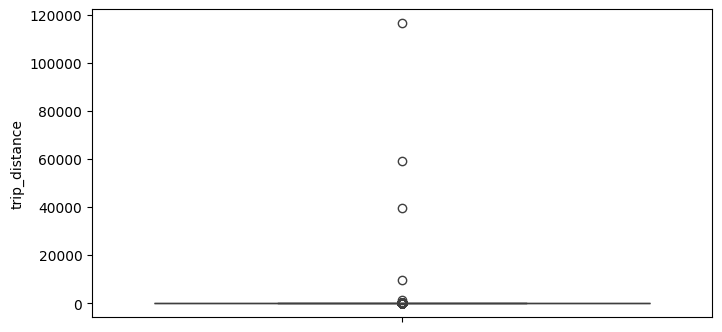

In [35]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df['trip_distance'].describe()
plt.figure(figsize=[8,4])
sns.boxplot(df.trip_distance)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [36]:
# remove passenger_count > 6
df_remove=df[df['passenger_count']<=6]
df_remove.to_csv('df',index=True)
df_remove.shape


(265491, 22)

In [37]:
# Continue with outlier handling
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
5         1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
6         2  2023-08-01 00:28:22   2023-08-01 00:28:33              1.0   
7         2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           3.67         1.0                  N           137            75   
2           3.20         1.0                  N           100           236   
5           4.80         1.0                  N           158           238   
6           0.00         2.0                  N           230           230   
7           4.13         1.0                  N           132           219   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1             1  ...      0.5        4.26          0.00   
2             1  ...      0.5        5.30          0.00   
5             1  ...      0.5        2.00          0.00   
6             1  ...      0.5       16.46          6.55   
7             1  ...      0.5        4.53          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0         25.56                   2.5         0.00   
2                    1.0         26.60                   2.5         0.00   
5                    1.0         31.00                   2.5         0.00   
6                    1.0         98.76                   2.5         1.75   
7                    1.0         27.18                   0.0         1.75   

         date  hour airport_fee  
1  2023-08-01     0        0.00  
2  2023-08-01     0        0.00  
5  2023-08-01     0        0.00  
6  2023-08-01     0        1.75  
7  2023-08-01     0        1.75  

[5 rows x 22 columns]

In [38]:
# Do any columns need standardising?
columns=['trip_distance','fare_amount','total_amount','tip_amount','tolls_amount']
df[columns]=(df[columns]-df[columns].mean())/df[columns].std()
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
5         1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
6         2  2023-08-01 00:28:22   2023-08-01 00:28:33              1.0   
7         2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1       1.268098         1.0                  N           137            75   
2       0.927049         1.0                  N           100           236   
5       2.088067         1.0                  N           158           238   
6      -1.394987         2.0                  N           230           230   
7       1.601891         1.0                  N           132           219   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1             1  ...      0.5    0.620414     -0.066241   
2             1  ...      0.5    1.031820     -0.066241   
5             1  ...      0.5   -0.273601     -0.066241   
6             1  ...      0.5    5.446518     10.041983   
7             1  ...      0.5    0.727222     -0.066241   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
1                    1.0      0.361933                   2.5         0.00   
2                    1.0      0.452667                   2.5         0.00   
5                    1.0      0.836538                   2.5         0.00   
6                    1.0      6.748156                   2.5         1.75   
7                    1.0      0.503268                   0.0         1.75   

         date  hour airport_fee  
1  2023-08-01     0        0.00  
2  2023-08-01     0        0.00  
5  2023-08-01     0        0.00  
6  2023-08-01     0        1.75  
7  2023-08-01     0        1.75  

[5 rows x 22 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [39]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [40]:
# Find and show the hourly trends in taxi pickups
df['hour']=df['tpep_pickup_datetime'].dt.hour
hourly_trends=df['hour'].value_counts().sort_index()
hourly_trends.head()

hour
0    6457
1    4486
2    3002
3    1927
4    1133
Name: count, dtype: int64

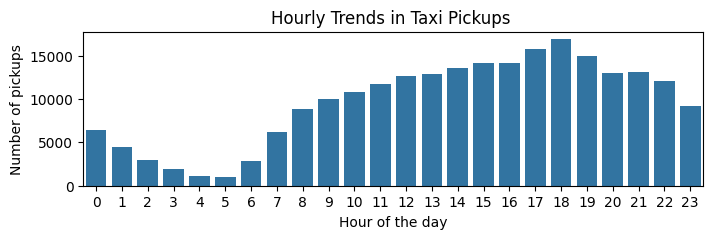

In [41]:
plt.figure(figsize=[8,2])
sns.barplot(x=hourly_trends.index,y=hourly_trends.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of pickups')
plt.title('Hourly Trends in Taxi Pickups ')
plt.show()

In [42]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week']=df['tpep_pickup_datetime'].dt.dayofweek
daily_trends=df['day_of_week'].value_counts().sort_index()
daily_trends.head()



day_of_week
0    27565
1    33824
2    35787
3    36513
4    34811
Name: count, dtype: int64

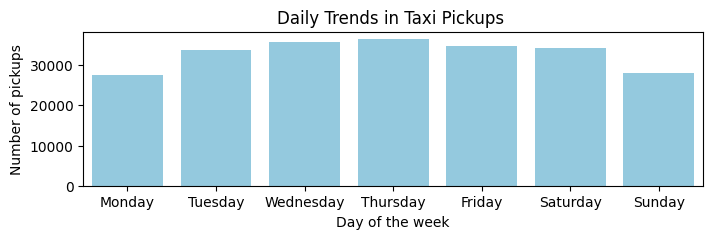

In [43]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=[8,2])
sns.barplot(x=days,y=daily_trends.values,color='skyblue')
plt.xlabel('Day of the week')
plt.ylabel('Number of pickups')
plt.title('Daily Trends in Taxi Pickups ')
plt.show()

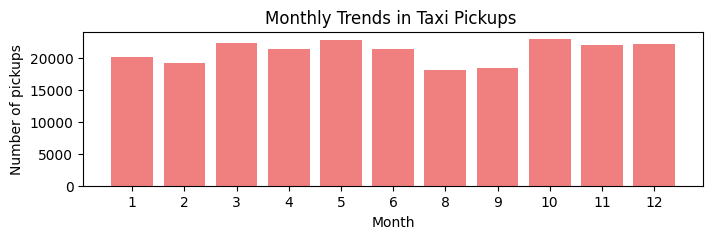

In [44]:
# Show the monthly trends in pickups
df['month']=df['tpep_pickup_datetime'].dt.month
monthly_trends=df['month'].value_counts().sort_index()
months=monthly_trends.index.astype(str)
plt.figure(figsize=[8,2])
plt.bar(months,monthly_trends.values,color='lightcoral')
plt.xlabel('Month')
plt.ylabel('Number of pickups')
plt.title('Monthly Trends in Taxi Pickups ')
plt.show()





##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [45]:
# Analyse the above parameters
df[['fare_amount','tip_amount','total_amount','trip_distance']].describe()
df[df[['fare_amount','tip_amount','total_amount',]].lt(0).any(axis=1)]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
8              2  2023-08-01 00:39:25   2023-08-01 00:50:31              1.0   
11             2  2023-08-01 01:10:01   2023-08-01 01:21:24              2.0   
12             1  2023-08-01 01:07:28   2023-08-01 01:13:25              2.0   
13             2  2023-08-01 01:13:40   2023-08-01 01:19:21              1.0   
...          ...                  ...                   ...              ...   
265485         2  2023-10-31 23:52:17   2023-10-31 23:55:16              2.0   
265486         1  2023-10-31 23:20:43   2023-10-31 23:33:45              1.0   
265487         1  2023-10-31 23:14:58   2023-10-31 23:15:24              1.0   
265489         2  2023-10-31 23:51:14   2023-10-31 23:57:38              1.0   
265491         1  2023-10-31 23:57:52   2023-11-01 00:05:24              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5            2.088067         1.0                  N           158   
8            2.196913         1.0                  N           132   
11          -0.016278         1.0                  N            68   
12          -0.379096         1.0                  N           230   
13          -0.676607         1.0                  N            50   
...               ...         ...                ...           ...   
265485      -0.633069         1.0                  N           137   
265486       0.491667         1.0                  N           163   
265487      -1.394987         1.0                  N           237   
265489      -0.444403         1.0                  N           237   
265491      -0.451660         1.0                  N           113   

        DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
5                238             1  ...     -0.066241                    1.0   
8                216             2  ...     -0.066241                    1.0   
11                79             1  ...     -0.066241                    1.0   
12                50             1  ...     -0.066241                    1.0   
13               161             1  ...     -0.066241                    1.0   
...              ...           ...  ...           ...                    ...   
265485            79             1  ...     -0.066241                    1.0   
265486            68             2  ...     -0.066241                    1.0   
265487           237             3  ...     -0.066241                    1.0   
265489           142             1  ...     -0.066241                    1.0   
265491           170             1  ...     -0.066241                    1.0   

        total_amount  congestion_surcharge  Airport_fee        date  hour  \
5           0.836538                   2.5         0.00  2023-08-01     0   
8           0.291266                   0.0         1.75  2023-08-01     0   
11         -0.004489                   2.5         0.00  2023-08-01     1   
12         -0.445941                   2.5         0.00  2023-08-01     1   
13         -0.646601                   2.5         0.00  2023-08-01     1   
...              ...                   ...          ...         ...   ...   
265485     -0.602980                   2.5         0.00  2023-10-31    23   
265486     -0.192935                   2.5         0.00  2023-10-31    23   
265487     -1.170062                   2.5         0.00  2023-10-31    23   
265489     -0.444196                   2.5         0.00  2023-10-31    23   
265491     -0.297627                   2.5         0.00  2023-10-31    23   

        airport_fee  day_of_week month  
5              0.00            1     8  
8              1.75            1     8  
11             0.00            1     8  
12             0.00            1     8  
13             0.00            1     8  
...             ...          ...   ...  
265485         0.00            1 

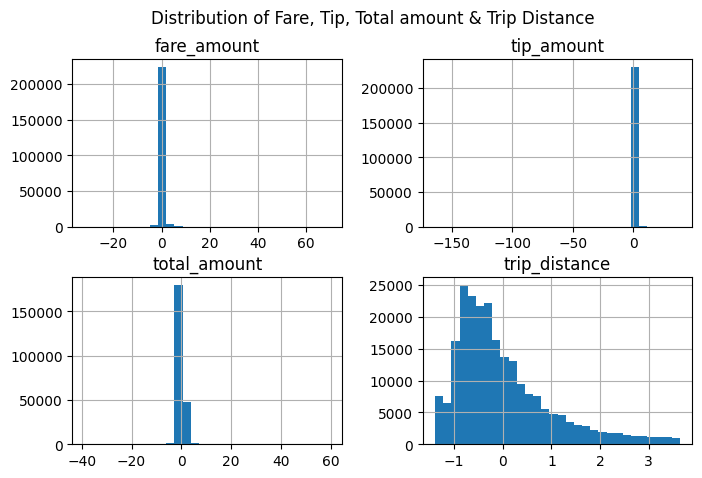

In [46]:
df[['fare_amount','tip_amount','total_amount','trip_distance']].hist(figsize=(8,5),bins=30)
plt.suptitle('Distribution of Fare, Tip, Total amount & Trip Distance')
plt.show()

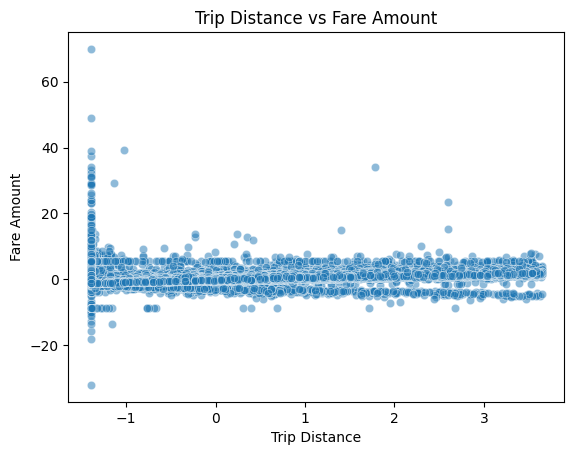

In [47]:
sns.scatterplot(x=df['trip_distance'],y=df['fare_amount'],alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()

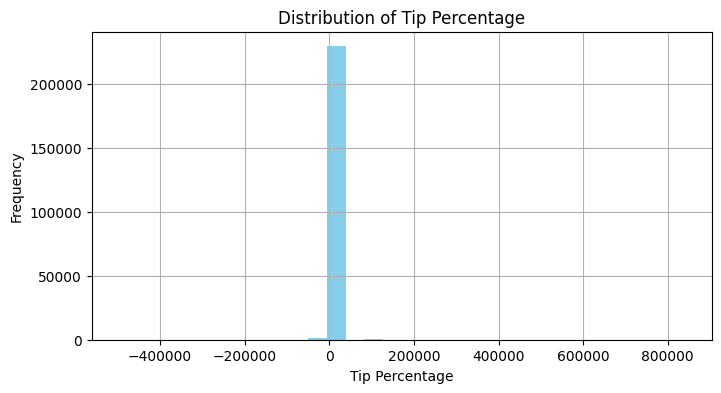

In [48]:
df['tip_percentage']=df['tip_amount']/df['total_amount']*100
plt.figure(figsize=[8,4])
df['tip_percentage'].hist(bins=30,color='skyblue')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Tip Percentage')
plt.show()


In [49]:
df['date']=df['tpep_pickup_datetime'].dt.date
daily_revenue=df.groupby('date')['total_amount'].sum()
daily_revenue.head()

date
2023-01-01    13.462978
2023-01-02   -50.454420
2023-01-03   -35.001168
2023-01-04   -30.803584
2023-01-05   -21.799324
Name: total_amount, dtype: float64

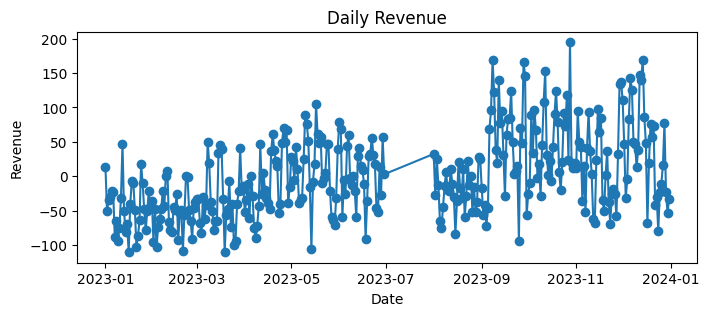

In [50]:
plt.figure(figsize=[8,3])
plt.plot(daily_revenue.index,daily_revenue.values , marker='o')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Daily Revenue')
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [51]:
# Create a df with non zero entries for the selected parameters.
df_non_zero=df[(df['fare_amount']>0)&(df['tip_amount']>0)&(df['total_amount']>0)&(df['trip_distance']>0)]
df_non_zero.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1          2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2          1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
7          2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   
9          2  2023-08-01 00:05:33   2023-08-01 00:22:15              1.0   
20         2  2023-08-01 03:51:48   2023-08-01 04:09:11              2.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1        1.268098         1.0                  N           137            75   
2        0.927049         1.0                  N           100           236   
7        1.601891         1.0                  N           132           219   
9        1.282611         1.0                  N            90           238   
20       2.733884         1.0                  N           249           151   

    payment_type  ...  improvement_surcharge  total_amount  \
1              1  ...                    1.0      0.361933   
2              1  ...                    1.0      0.452667   
7              1  ...                    1.0      0.503268   
9              1  ...                    1.0      0.620174   
20             1  ...                    1.0      1.461201   

    congestion_surcharge  Airport_fee        date  hour  airport_fee  \
1                    2.5         0.00  2023-08-01     0         0.00   
2                    2.5         0.00  2023-08-01     0         0.00   
7                    0.0         1.75  2023-08-01     0         1.75   
9                    2.5         0.00  2023-08-01     0         0.00   
20                   2.5         0.00  2023-08-01     3         0.00   

    day_of_week  month tip_percentage  
1             1      8     171.416774  
2             1      8     227.942619  
7             1      8     144.499945  
9             1      8      65.594494  
20            1      8      99.311251  

[5 rows x 25 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [52]:
# Group data by month and analyse monthly revenue
df['month']=df['tpep_pickup_datetime'].dt.month
monthly_revenue=df.groupby('month')['total_amount'].sum()
monthly_revenue.head()


month
1   -1397.901512
2   -1481.045917
3   -1076.280105
4    -316.684685
5     278.892445
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [53]:
# Calculate proportion of each quarter
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['quarter']=df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue=df.groupby('quarter')['total_amount'].sum()
quarterly_proportion=(quarterly_revenue/quarterly_revenue.sum())*100
quarterly_proportion.head()



quarter
1   -3.639179e+15
2    9.056159e+13
3    6.781064e+14
4    2.870511e+15
Name: total_amount, dtype: float64

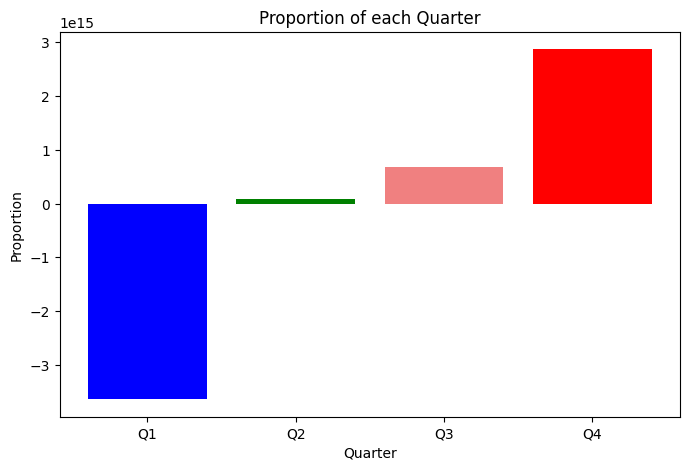

In [54]:
plt.figure(figsize=[8,5])
plt.bar(quarterly_proportion.index,quarterly_proportion.values,color=['blue','green','lightcoral','red'])
plt.xlabel('Quarter')
plt.ylabel('Proportion')
plt.title('Proportion of each Quarter')
plt.xticks([1,2,3,4],['Q1','Q2','Q3','Q4'])
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

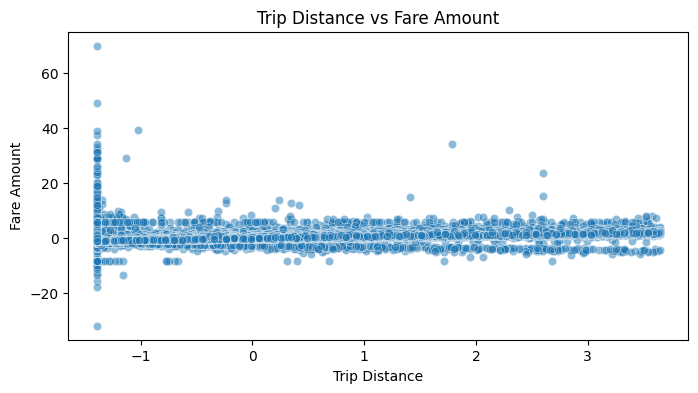

In [55]:
# Show how trip fare is affected by distance
df[df['trip_distance']>0]
plt.figure(figsize=[8,4])
sns.scatterplot(x=df['trip_distance'],y=df['fare_amount'],alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()


In [56]:
correlation=df['trip_distance'].corr(df['fare_amount'])
correlation

0.5564738443129242

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

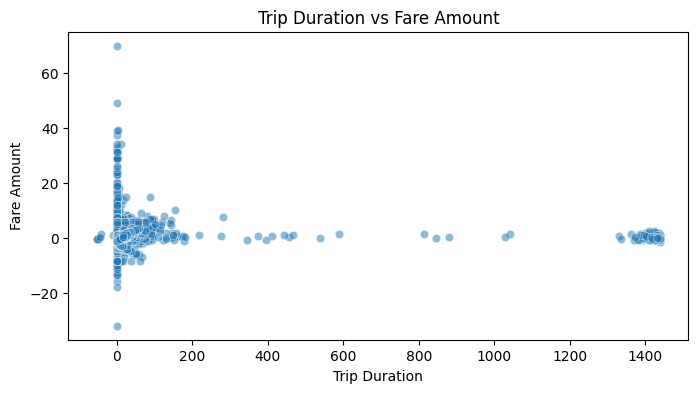

In [57]:
# Show relationship between fare and trip duration
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60
plt.figure(figsize=[8,4])
sns.scatterplot(x=df['trip_duration'],y=df['fare_amount'],alpha=0.5)
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.title('Trip Duration vs Fare Amount')
plt.show()


In [58]:
correlation=df['trip_duration'].corr(df['fare_amount'])
correlation

0.1339999283685027

In [59]:
# Show relationship between fare and number of passengers
plt.figure(figsize=[8,4])
sns.boxplot(x=df['passenger_count'],y=df['fare_amount'])
plt.xlabel('Number of passengers')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs Number of Passengers')
plt.show()


In [60]:
correlation=df['passenger_count'].corr(df['fare_amount'])
correlation

0.019002719156033257

In [61]:
# Show relationship between tip and trip distance
plt.figure(figsize=[8,4])
sns.scatterplot(x=df['trip_distance'],y=df['tip_amount'],alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Tip Amount vs Trip Distance')
plt.show()




In [62]:
correlation=df['trip_distance'].corr(df['tip_amount'])
correlation

0.33084378617073085

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [63]:
# Analyse the distribution of different payment types (payment_type).
payment_mapping={1:'Credit card',2:'Cash',3:'No charge',4:'Dispute'}
df['payment_type']=df['payment_type'].map(payment_mapping)
df['payment_type'].value_counts()




payment_type
Credit card    180547
Cash            38332
Dispute          2989
No charge        1560
Name: count, dtype: int64

In [64]:
plt.figure(figsize=[8,4])
df['payment_type'].value_counts().plot(kind='bar',color='lightcoral')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Types')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [65]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [66]:
# import geopandas as gpd
import geopandas as gpd


# Read the shapefile using geopandas
zones =gpd.read_file('/content/drive/MyDrive/trip_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [67]:
# print(zones.info())
print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


In [68]:
zones.plot(color='lightcoral')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [69]:
# Merge zones and trip records using locationID and PULocationID
merged_df=df.merge(zones,left_on='PULocationID',right_on='LocationID')
merged_df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
1              1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
2              1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
3              2  2023-08-01 00:28:22   2023-08-01 00:28:33              1.0   
4              2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   
...          ...                  ...                   ...              ...   
228830         1  2023-10-31 23:00:53   2023-10-31 23:28:09              1.0   
228831         1  2023-10-31 23:57:52   2023-11-01 00:05:24              1.0   
228832         2  2023-10-31 23:44:38   2023-11-01 00:02:33              2.0   
228833         2  2023-10-31 23:00:07   2023-10-31 23:17:52              1.0   
228834         1  2023-10-31 23:28:33   2023-10-31 23:44:11              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0            1.268098         1.0                  N           137   
1            0.927049         1.0                  N           100   
2            2.088067         1.0                  N           158   
3           -1.394987         2.0                  N           230   
4            1.601891         1.0                  N           132   
...               ...         ...                ...           ...   
228830       0.927049         1.0                  N           100   
228831      -0.451660         1.0                  N           113   
228832       0.839973         1.0                  N           234   
228833       2.443629         1.0                  N            79   
228834       0.346540         1.0                  N           161   

        DOLocationID payment_type  ...  tip_percentage  quarter  \
0                 75  Credit card  ...      171.416774        3   
1                236  Credit card  ...      227.942619        3   
2                238  Credit card  ...      -32.706406        3   
3                230  Credit card  ...       80.711204        3   
4                219  Credit card  ...      144.499945        3   
...              ...          ...  ...             ...      ...   
228830           141  Credit card  ...      145.789134        4   
228831           170  Credit card  ...      -40.984397        4   
228832            87  Credit card  ...      135.197095        4   
228833            33  Credit card  ...       62.984064        4   
228834            79  Credit card  ...      170.735359        4   

        trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0           11.016667       137    0.046108    0.000116   
1           12.850000       100    0.024813    0.000037   
2           15.466667       158    0.054810    0.000186   
3            0.183333       230    0.031028    0.000056   
4            8.783333       132    0.245479    0.002038   
...               ...       ...         ...         ...   
228830      27.266667       100    0.024813    0.000037   
228831       7.533333       113    0.032745    0.000058   
228832      17.916667       234    0.036072    0.000073   
228833      17.750000        79    0.042625    0.000108   
228834      15.633333       161    0.035804    0.000072   

                                 zone  LocationID    borough  \
0                            Kips Bay         137  Manhattan   
1                    Garment District         100  Manhattan   
2       Meatpacking/West Village West         158  Manhattan   
3           Times Sq/Theatre District         230  Manhattan   
4                         JFK Airport         132     Queens   
...                               ...         ...        ...   
228830               Garment District         100  Manhattan   
228831        Greenwich Village North         113  Manhattan   
228832                       Union Sq         234  Manhattan   
228833                   East Village          79  M

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [70]:
# Group data by location and calculate the number of trips
trip_counts=df.groupby('PULocationID').size().reset_index(name='Total_Trips')
trip_counts.head()


PULocationID  Total_Trips
0             1           32
1             3            4
2             4          309
3             6            3
4             7          131

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [71]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts=df['PULocationID'].value_counts().reset_index()
trip_counts.columns=['LocationID','Total_Trips']
trip_counts.head()



LocationID  Total_Trips
0         237        12152
1         161        11254
2         236        10951
3         162         8691
4         186         8600

In [72]:
taxi_zones=zones.merge(trip_counts,on='LocationID')
taxi_zones['Total_trips']=taxi_zones['Total_Trips']
taxi_zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   

   Total_Trips  Total_trips  
0           32           32  
1            4            4  
2          309          309  
3            3            3  
4          131          131

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [73]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
taxi_zones.plot(column='Total_trips',ax=ax,legend=True,legend_kwds={'label': "Total Trips", 'orientation': "vertical"})
plt.show()
#turn off tick lables
ax.set_title("NYC Taxi Trips by Zone",fontsize=14)
ax.set_xticklabels([])
ax.set_yticklabels([])

[Text(0, 120000.0, ''),
 Text(0, 140000.0, ''),
 Text(0, 160000.0, ''),
 Text(0, 180000.0, ''),
 Text(0, 200000.0, ''),
 Text(0, 220000.0, ''),
 Text(0, 240000.0, ''),
 Text(0, 260000.0, ''),
 Text(0, 280000.0, '')]

In [74]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones=taxi_zones.sort_values(by='Total_trips',ascending=False)
sorted_zones[['LocationID','Total_trips']].head()


LocationID  Total_trips
207         237        12152
140         161        11254
206         236        10951
141         162         8691
162         186         8600

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [75]:
# Find routes which have the slowest speeds at different times of the day
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])


In [76]:
df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60


In [77]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

In [78]:
route_speed=df.groupby(['PULocationID','DOLocationID','pickup_hour']).agg(
    average_distance=('trip_distance','mean'),
    average_duration=('trip_duration','mean')
).reset_index()


In [79]:
route_speed['speed']=route_speed['average_distance']/route_speed['average_duration']
slowest_routes=route_speed.sort_values(by='speed')
slowest_routes.head()

PULocationID  DOLocationID  pickup_hour  average_distance  \
3300             45           264           19         -1.394987   
13737           107           264            7         -1.394987   
21632           142           264           11         -1.394987   
12588           100           264           17         -1.394987   
33745           186           264            6         -1.394987   

       average_duration  speed  
3300                0.0   -inf  
13737               0.0   -inf  
21632               0.0   -inf  
12588               0.0   -inf  
33745               0.0   -inf

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [80]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips=df['pickup_hour'].value_counts().sort_index()
hourly_trips.head()


pickup_hour
0    6457
1    4486
2    3002
3    1927
4    1133
Name: count, dtype: int64

In [81]:
busiest_hour=hourly_trips.idxmax()
busiest_hour_trips=hourly_trips.max()


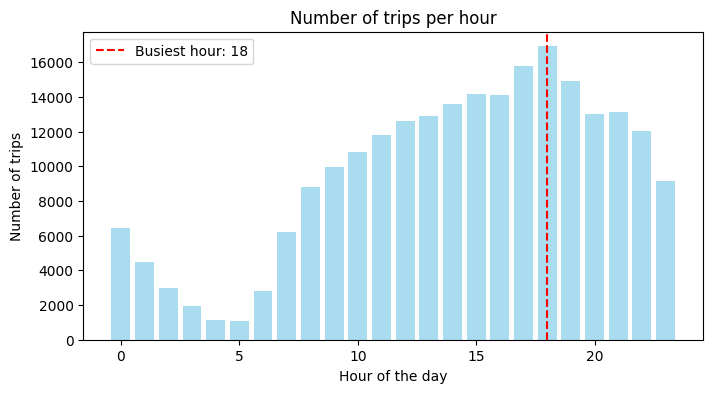

In [82]:
plt.figure(figsize=[8,4])
plt.bar(hourly_trips.index,hourly_trips.values,color='skyblue',alpha=0.7)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Number of trips per hour')
#Highlight the busiest hour
plt.axvline(busiest_hour,color='red',linestyle='--',label=f'Busiest hour: {busiest_hour}')
plt.legend()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [83]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1
hourly_trips=df['pickup_hour'].value_counts().sort_values(ascending=False)
top_5_hours=hourly_trips.head(5)
top_5_hours.head()



pickup_hour
18    16918
17    15813
19    14943
15    14166
16    14142
Name: count, dtype: int64

In [84]:
top_5_hours_scaled=(top_5_hours/sample_fraction).astype(int)
top_5_hours_scaled.head()

pickup_hour
18    169180
17    158130
19    149430
15    141660
16    141420
Name: count, dtype: int64

In [85]:
busiest_hour_df=pd.DataFrame({"Hours":top_5_hours_scaled.index,"Sampled trips":top_5_hours.values,"Scaled up trips":top_5_hours_scaled.values})
busiest_hour_df.head()


Hours  Sampled trips  Scaled up trips
0     18          16918           169180
1     17          15813           158130
2     19          14943           149430
3     15          14166           141660
4     16          14142           141420

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [86]:
# Compare traffic trends for the week days and weekends
df['day_of_week']=df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour


In [87]:
df_weekday=df[df['day_of_week']<5]
df_weekend=df[df['day_of_week']>=5]

In [88]:
hourly_weekday=df_weekday['pickup_hour'].value_counts().sort_index()
hourly_weekend=df_weekend['pickup_hour'].value_counts().sort_index()

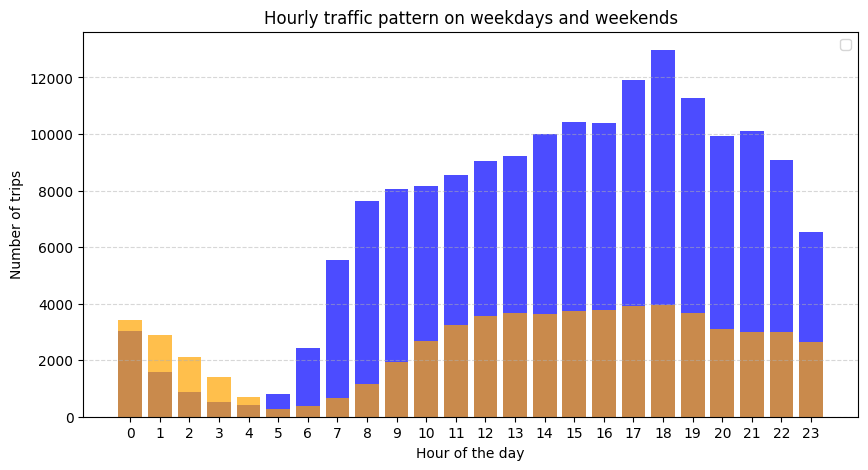

In [89]:
plt.figure(figsize=[10,5])
plt.bar(hourly_weekday.index,hourly_weekday.values,color='blue',alpha=0.7)
plt.bar(hourly_weekend.index,hourly_weekend.values,color='orange',alpha=0.7)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Hourly traffic pattern on weekdays and weekends')
plt.xticks(range(24))
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [90]:
# Find top 10 pickup and dropoff zones
pickup_counts=df.groupby('PULocationID').size().sort_values(ascending=False)
dropoff_counts=df.groupby('DOLocationID').size().sort_values(ascending=False)
top_pickup_zones=pickup_counts.head(10).index
top_dropoff_zones=dropoff_counts.head(10).index


In [91]:
df_top_pickup=df[df['PULocationID'].isin(top_pickup_zones)]
df_top_dropoff=df[df['DOLocationID'].isin(top_dropoff_zones)]


In [92]:
hourly_pickup=df_top_pickup.groupby('pickup_hour')['PULocationID'].count()
hourly_dropoff=df_top_dropoff.groupby('dropoff_hour')['DOLocationID'].count()

In [93]:
plt.figure(figsize=[10,5])
plt.bar(hourly_pickup.index,hourly_pickup.values,color='blue',alpha=0.7)
plt.bar(hourly_dropoff.index,hourly_dropoff.values,color='orange',alpha=0.7)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Hourly traffic pattern for top 10 pickup and dropoff zones')
plt.xticks(range(24))
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.legend()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [94]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts=df['PULocationID'].value_counts()
dropoff_counts=df['DOLocationID'].value_counts()

In [95]:
zones_ratios=pd.DataFrame({'Pickup':pickup_counts,'Dropoffs':dropoff_counts})
zones_ratios.fillna (1,inplace=True)
zones_ratios ['Pick/Dropoff Ratio']=zones_ratios['Pickup']/zones_ratios['Dropoffs']
zones_ratios.head()

Pickup  Dropoffs  Pick/Dropoff Ratio
1    32.0      30.0            1.066667
3     4.0       7.0            0.571429
4   309.0     966.0            0.319876
6     3.0       3.0            1.000000
7   131.0     641.0            0.204368

In [96]:
top_10_ratios=zones_ratios.nlargest(10,'Pick/Dropoff Ratio')
top_10_ratios.head()

Pickup  Dropoffs  Pick/Dropoff Ratio
138  1154.0     262.0            4.404580
101     4.0       1.0            4.000000
154     4.0       1.0            4.000000
22      7.0       2.0            3.500000
132  1696.0     617.0            2.748784

In [97]:
bottom_10_ratios=zones_ratios.nsmallest(10,'Pick/Dropoff Ratio')
bottom_10_ratios.head()

Pickup  Dropoffs  Pick/Dropoff Ratio
28      4.0      60.0            0.066667
192     1.0      14.0            0.071429
202    10.0     135.0            0.074074
139     3.0      39.0            0.076923
217     5.0      63.0            0.079365

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [98]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour


In [99]:
night_df=df[(df['pickup_hour']>=23)|(df['pickup_hour']<=5)]

In [100]:
night_pickup=night_df['PULocationID'].value_counts()
night_dropoff=night_df['DOLocationID'].value_counts()

In [101]:
top_night_pickup=night_pickup.head(10)
top_night_pickup

PULocationID
79     2184
249    1693
148    1371
48     1369
114    1232
230    1013
186     915
107     850
68      836
234     816
Name: count, dtype: int64

In [102]:
top_night_dropoff=night_dropoff.head(10)
top_night_dropoff

DOLocationID
79     1148
48      948
170     875
107     798
68      795
141     741
263     696
249     663
90      639
230     637
Name: count, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [103]:
# Filter for night hours (11 PM to 5 AM)
night_df=df[(df['pickup_hour']>=23)|df['pickup_hour']<5]
day_df=df[(df['pickup_hour']>=5)&(df['pickup_hour']<23)]
night_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
5         1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
6         2  2023-08-01 00:28:22   2023-08-01 00:28:33              1.0   
7         2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1       1.268098         1.0                  N           137            75   
2       0.927049         1.0                  N           100           236   
5       2.088067         1.0                  N           158           238   
6      -1.394987         2.0                  N           230           230   
7       1.601891         1.0                  N           132           219   

  payment_type  ...        date  hour  airport_fee  day_of_week  month  \
1  Credit card  ...  2023-08-01     0         0.00            1      8   
2  Credit card  ...  2023-08-01     0         0.00            1      8   
5  Credit card  ...  2023-08-01     0         0.00            1      8   
6  Credit card  ...  2023-08-01     0         1.75            1      8   
7  Credit card  ...  2023-08-01     0         1.75            1      8   

   tip_percentage  quarter  trip_duration  pickup_hour dropoff_hour  
1      171.416774        3      11.016667            0            0  
2      227.942619        3      12.850000            0            0  
5      -32.706406        3      15.466667            0            1  
6       80.711204        3       0.183333            0            0  
7      144.499945        3       8.783333            0            1  

[5 rows x 29 columns]

In [104]:
day_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23         2  2023-08-01 05:47:33   2023-08-01 05:53:13              1.0   
26         2  2023-08-01 05:14:27   2023-08-01 05:25:03              1.0   
29         2  2023-08-01 06:50:11   2023-08-01 06:56:34              2.0   
30         2  2023-08-01 06:55:44   2023-08-01 07:00:04              1.0   
32         2  2023-08-01 06:40:53   2023-08-01 06:44:42              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
23      -0.618556         1.0                  N           162            48   
26       0.702102         1.0                  N           143            75   
29       0.186900         1.0                  N           148           256   
30      -0.945093         1.0                  N            68           230   
32      -0.560505         1.0                  N           236           140   

   payment_type  ...        date  hour  airport_fee  day_of_week  month  \
23         Cash  ...  2023-08-01     5          0.0            1      8   
26  Credit card  ...  2023-08-01     5          0.0            1      8   
29  Credit card  ...  2023-08-01     6          0.0            1      8   
30         Cash  ...  2023-08-01     6          0.0            1      8   
32  Credit card  ...  2023-08-01     6          0.0            1      8   

    tip_percentage  quarter  trip_duration  pickup_hour dropoff_hour  
23      143.389476        3       5.666667            5            5  
26     -641.922601        3      10.600000            5            5  
29      -60.069232        3       6.383333            6            6  
30      111.850632        3       4.333333            6            7  
32       53.765990        3       3.816667            6            6  

[5 rows x 29 columns]

In [105]:
#calculate total revenue for night and day
night_revenue=night_df['total_amount'].sum()
day_revenue=day_df['total_amount'].sum()
total_revenue=night_revenue + day_revenue

In [106]:
night_share=(night_revenue/total_revenue)*100
night_share

-1.0486890918601761e-11

In [107]:
day_share=(day_revenue/total_revenue)*100
day_share

100.00000000001049

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [108]:
# Analyse the fare per mile per passenger for different passenger counts
df=df[df['trip_distance']>0]
df['fare_per_mile_per_passenger']=df['total_amount']/(df['trip_distance']*df['passenger_count'])
df['fare_per_mile_per_passenger']=df['fare_per_mile_per_passenger'].replace([float('inf'),float('-inf')],None)
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
5         1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
7         2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   
8         2  2023-08-01 00:39:25   2023-08-01 00:50:31              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1       1.268098         1.0                  N           137            75   
2       0.927049         1.0                  N           100           236   
5       2.088067         1.0                  N           158           238   
7       1.601891         1.0                  N           132           219   
8       2.196913         1.0                  N           132           216   

  payment_type  ...  hour  airport_fee  day_of_week  month  tip_percentage  \
1  Credit card  ...     0         0.00            1      8      171.416774   
2  Credit card  ...     0         0.00            1      8      227.942619   
5  Credit card  ...     0         0.00            1      8      -32.706406   
7  Credit card  ...     0         1.75            1      8      144.499945   
8         Cash  ...     0         1.75            1      8     -365.564670   

   quarter  trip_duration  pickup_hour  dropoff_hour  \
1        3      11.016667            0             0   
2        3      12.850000            0             0   
5        3      15.466667            0             1   
7        3       8.783333            0             1   
8        3      11.100000            0             0   

  fare_per_mile_per_passenger  
1                    0.285414  
2                    0.488287  
5                    0.400628  
7                    0.062834  
8                     0.13258  

[5 rows x 30 columns]

In [109]:
fare_analysis=df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
fare_analysis

passenger_count
0.0         NaN
1.0    0.673447
2.0    0.284125
3.0     0.15315
4.0    0.149435
5.0    0.216202
6.0    0.115964
Name: fare_per_mile_per_passenger, dtype: object

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [110]:
# Compare the average fare per mile for different days and for different times of the day
df['day_of_week']=df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour

In [111]:
df=df[df['trip_distance']>0]
df['fare_per_mile']=  df['fare_amount']/df['trip_distance']
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-08-01 00:40:07   2023-08-01 00:51:08              1.0   
2         1  2023-08-01 00:38:25   2023-08-01 00:51:16              1.0   
5         1  2023-08-01 00:54:47   2023-08-01 01:10:15              1.0   
7         2  2023-08-01 00:52:56   2023-08-01 01:01:43              5.0   
8         2  2023-08-01 00:39:25   2023-08-01 00:50:31              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1       1.268098         1.0                  N           137            75   
2       0.927049         1.0                  N           100           236   
5       2.088067         1.0                  N           158           238   
7       1.601891         1.0                  N           132           219   
8       2.196913         1.0                  N           132           216   

  payment_type  ...  airport_fee  day_of_week  month  tip_percentage  quarter  \
1  Credit card  ...         0.00            1      8      171.416774        3   
2  Credit card  ...         0.00            1      8      227.942619        3   
5  Credit card  ...         0.00            1      8      -32.706406        3   
7  Credit card  ...         1.75            1      8      144.499945        3   
8         Cash  ...         1.75            1      8     -365.564670        3   

   trip_duration  pickup_hour  dropoff_hour  fare_per_mile_per_passenger  \
1      11.016667            0             0                     0.285414   
2      12.850000            0             0                     0.488287   
5      15.466667            0             1                     0.400628   
7       8.783333            0             1                     0.062834   
8      11.100000            0             0                      0.13258   

  fare_per_mile  
1      0.177538  
2      0.242852  
5      0.483647  
7      0.274150  
8      0.297318  

[5 rows x 31 columns]

In [112]:
fare_by_day=df.groupby('day_of_week')['fare_per_mile'].mean().sort_values()
fare_by_day

day_of_week
6    0.055368
0    0.310651
5    0.490400
4    0.661728
1    0.823865
2    0.900053
3    0.985965
Name: fare_per_mile, dtype: float64

In [113]:
fare_by_hour=df.groupby('pickup_hour')['fare_per_mile'].mean()
fare_by_hour.head(10)

pickup_hour
0   -0.167221
1   -0.245918
2   -0.492413
3   -0.337662
4   -0.662058
5   -0.649857
6   -0.785042
7   -0.063395
8    0.565140
9    0.961187
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [114]:
# Compare fare per mile for different vendors
df['hour_of_day']=df['tpep_pickup_datetime'].dt.hour
df['fare_per_mile']=df['fare_amount']/df['trip_distance']
fare_by_vendor_hour=df.groupby(['VendorID','hour_of_day'])['fare_per_mile'].mean().unstack()
fare_by_vendor_hour.head()


hour_of_day        0         1         2         3         4         5   \
VendorID                                                                  
1            0.009226  0.130702 -0.066827 -0.096970 -0.103248 -0.416139   
2           -0.217453 -0.347779 -0.617697 -0.405275 -0.816910 -0.722655   
6            0.378330       NaN       NaN       NaN       NaN       NaN   

hour_of_day        6         7         8         9   ...        14        15  \
VendorID                                             ...                       
1           -0.177728  0.111001  0.567755  0.741081  ...  1.164225  1.162241   
2           -1.009646 -0.125849  0.563738  1.048310  ...  1.219979  1.615014   
6           -0.152245  2.641190  1.091308       NaN  ...  0.884293  1.634001   

hour_of_day        16        17        18        19        20        21  \
VendorID                                                                  
1            0.994645  0.964962  0.708021  0.430380  0.319097  0.229857   
2            1.338015  1.297856  0.904291  0.321315  0.056116 -0.093801   
6                 NaN  1.339832       NaN       NaN       NaN       NaN   

hour_of_day        22       23  
VendorID                        
1            0.129142  0.19145  
2            0.060942 -0.07070  
6                 NaN      NaN  

[3 rows x 24 columns]

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [115]:
# Defining distance tiers
df=df[df['trip_distance']>0]
df['fare_per_mile']=df['fare_amount']/df['trip_distance']

In [116]:
conditions=[(df['trip_distance']<=2),(df['trip_distance']>2)&(df['trip_distance']<=5),(df['trip_distance']>5)]
labels=['0-2 miles','2-5 miles','5+ miles']

In [117]:
df['distance_category']=pd.cut(df['trip_distance'],bins=[0,2,5,float('inf')],labels=labels,right=True)
tiered_fare_analysis=df.groupby(['VendorID','distance_category'])['fare_per_mile'].mean().unstack()
tiered_fare_analysis.head()

distance_category  0-2 miles  2-5 miles  5+ miles
VendorID                                         
1                   0.624413   0.562298       NaN
2                   0.638031   0.554770       NaN
6                   1.494148   1.233035       NaN

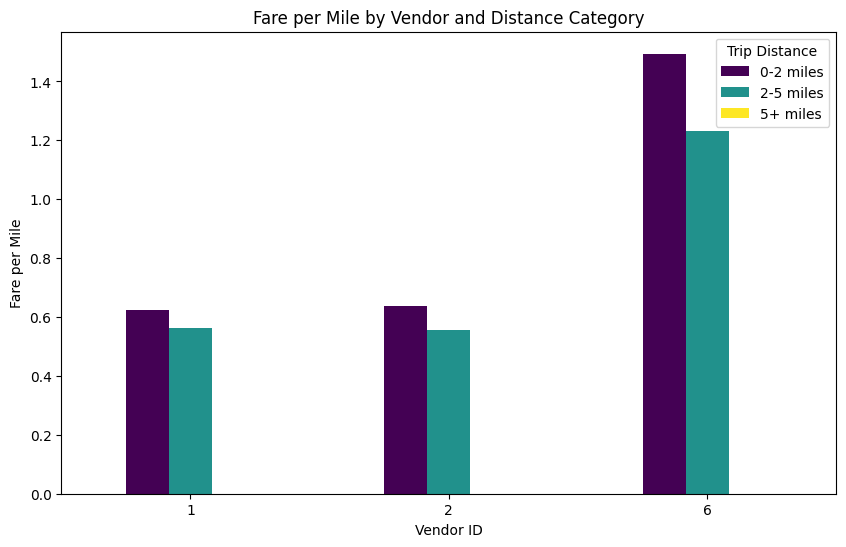

In [118]:
tiered_fare_analysis.plot(kind='bar',figsize=(10,6), colormap='viridis')
plt.xlabel("Vendor ID")
plt.ylabel("Fare per Mile")
plt.title("Fare per Mile by Vendor and Distance Category")
plt.xticks(rotation=0)
plt.legend(title="Trip Distance",loc="upper right")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [119]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df=df[df['total_amount']>0]
df['tip_percentage']=(df['tip_amount']/df['total_amount'])*100
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour

In [120]:
labels=['0-2 miles','2-5 miles','5+ miles']
df['distance_category']=pd.cut(df['trip_distance'],bins=[0,2,5,float('inf')],labels=labels,right=True)

In [121]:
tip_by_distance=df.groupby('distance_category')['tip_percentage'].mean()
tip_by_distance

distance_category
0-2 miles    27.375648
2-5 miles    29.650399
5+ miles           NaN
Name: tip_percentage, dtype: float64

In [122]:
tip_by_passenger=df.groupby('passenger_count')['tip_percentage'].mean()
tip_by_passenger

passenger_count
0.0    50.816540
1.0    29.472717
2.0    26.176378
3.0     8.297983
4.0   -26.982730
5.0    56.476342
6.0    38.800021
Name: tip_percentage, dtype: float64

In [123]:
tip_by_hour=df.groupby('pickup_hour')['tip_percentage'].mean()
tip_by_hour.head()

pickup_hour
0    30.231018
1    46.371389
2    42.654909
3     4.134501
4   -30.770225
Name: tip_percentage, dtype: float64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [124]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df=df[df['total_amount']>0]
df['tip_percentage']=(df['tip_amount']/df['total_amount'])*100
low_tip_trips=df[df['tip_percentage']<10]
high_tip_trips=df[df['tip_percentage']>25]

In [125]:
comparision=pd.DataFrame({'Avg trip distance':[low_tip_trips['trip_distance'].mean(),high_tip_trips['trip_distance'].mean()],
                          'Avg fare amount':[low_tip_trips['fare_amount'].mean(),high_tip_trips['fare_amount'].mean()],
                          'Avg passenger count':[low_tip_trips['passenger_count'].mean(),high_tip_trips['passenger_count'].mean()],
                          'Avg pickup Hour':[low_tip_trips['tpep_pickup_datetime'].dt.hour.mean(),high_tip_trips['tpep_pickup_datetime'].dt.hour.mean()]},
                         index=['Tip<10%','Tip>25%'])


comparision

Avg trip distance  Avg fare amount  Avg passenger count  \
Tip<10%           1.310175         0.902537             1.377108   
Tip>25%           1.082717         0.720172             1.361443   

         Avg pickup Hour  
Tip<10%        14.223830  
Tip>25%        14.755046

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [126]:
# See how passenger count varies across hours and days
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
passenger_by_hour=df.groupby('pickup_hour')['passenger_count'].mean()
passenger_by_hour.head(10)

pickup_hour
0    1.395663
1    1.434243
2    1.450382
3    1.431594
4    1.304225
5    1.181435
6    1.196232
7    1.270356
8    1.242698
9    1.311920
Name: passenger_count, dtype: float64

In [127]:
passenger_by_day=df.groupby('pickup_day')['passenger_count'].mean()
passenger_by_day

pickup_day
Friday       1.387781
Monday       1.339076
Saturday     1.464916
Sunday       1.436742
Thursday     1.312712
Tuesday      1.318929
Wednesday    1.302216
Name: passenger_count, dtype: float64

In [128]:
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
passenger_by_day=passenger_by_day.reindex(days_order)
passenger_by_day

pickup_day
Monday       1.339076
Tuesday      1.318929
Wednesday    1.302216
Thursday     1.312712
Friday       1.387781
Saturday     1.464916
Sunday       1.436742
Name: passenger_count, dtype: float64

In [129]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
passenger_by_hour.plot(kind='bar',color='skyblue')
plt.xlabel('Hour of the day')
plt.ylabel('Average passenger count')
plt.title('Average passenger count by hour')
plt.xticks(rotation=0)
plt.subplot(1,2,2)
passenger_by_day.plot(kind='bar',color='salmon')
plt.xlabel('Day of the week')
plt.ylabel('Average passenger count')
plt.title('Average passenger count by day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [130]:
# How does passenger count vary across zones
passenger_by_zone=df.groupby('PULocationID')['passenger_count'].agg(['sum','mean'])
passenger_by_zone=passenger_by_zone.sort_values(by='sum',ascending=False)
passenger_by_zone.head()


sum      mean
PULocationID                  
161           4527.0  1.373900
186           3790.0  1.343972
236           3570.0  1.350227
68            3361.0  1.395185
230           3350.0  1.449589

In [131]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone=df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count':'Avg_passenger_count'},inplace=True)
avg_passenger_by_zone.head()

PULocationID  Avg_passenger_count
0             3             1.000000
1             4             1.389706
2             7             1.140000
3             8             1.000000
4             9             1.000000

In [132]:
zones=gpd.read_file('/content/drive/MyDrive/trip_zones/taxi_zones.shp')
trips_by_zone=df.groupby('PULocationID').size().reset_index()
zones_with_trips=zones.merge(avg_passenger_by_zone,left_on='LocationID',right_on='PULocationID',how='left')
zones_with_trips['Avg_passenger_count'].fillna(0,inplace=True)
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  Avg_passenger_count  
0           NaN             0.000000  
1           NaN             0.000000  
2           3.0             1.000000  
3           4.0             1.389706  
4           NaN             0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [133]:
# How often is each surcharge applied?
df_surcharge=df[df['congestion_surcharge']>0]
surcharge_by_pickup=df_surcharge['PULocationID'].value_counts().head()
surcharge_by_dropoff=df_surcharge['DOLocationID'].value_counts().head()

In [134]:
df_surcharge['tpep_pickup_datetime']=pd.to_datetime(df_surcharge['tpep_pickup_datetime'])
df_surcharge['pickup_hour']=pd.to_datetime(df_surcharge['tpep_dropoff_datetime']).dt.hour
surcharge_by_hour=df_surcharge['pickup_hour'].value_counts().sort_index()
surcharge_by_hour.head(10)

pickup_hour
0    2649
1    1785
2    1176
3     742
4     451
5     208
6     434
7    1127
8    2088
9    2480
Name: count, dtype: int64

In [135]:
plt.figure(figsize=[8,5])
surcharge_by_pickup.plot(kind='bar',color='skyblue')
plt.xlabel('Pickup zone')
plt.ylabel('Number of trips with surcharge')
plt.title('Top 10 pickup zones with surcharge')
plt.xticks(rotation=45)
plt.show()

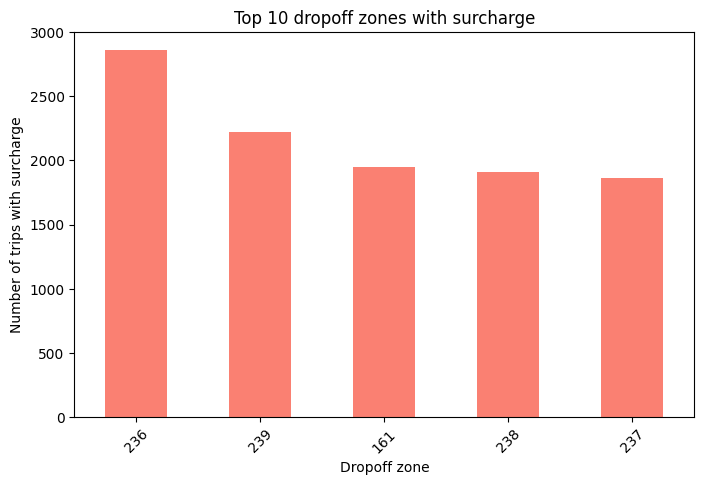

In [136]:
plt.figure(figsize=[8,5])
surcharge_by_dropoff.plot(kind='bar',color='salmon')
plt.xlabel('Dropoff zone')
plt.ylabel('Number of trips with surcharge')
plt.title('Top 10 dropoff zones with surcharge')
plt.xticks(rotation=45)
plt.show()

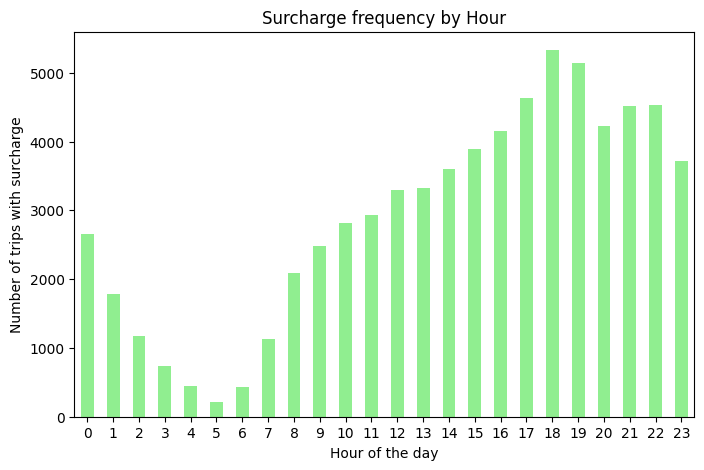

In [137]:
plt.figure(figsize=[8,5])
surcharge_by_hour.plot(kind='bar',color='lightgreen')
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips with surcharge')
plt.title('Surcharge frequency by Hour')
plt.xticks(rotation=0)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [138]:
1.Demand based Dynamic Routing:
.Peak Demand Area
.Time Based Routing
.Geospatial mapping

In [138]:
2.Reduce Empty Trips & improve Fleet Utilization:
.Balance Pickups & Dropoffs
.Minimize Deadhead miles

In [138]:
3.Optimize Traffic Flow & Avoid Coggested routes:
.Identify slow zones
.Bypass congestion

In [138]:
4.Optimizing Pricing & Fare Strategies:
.Surcharge zones
.Dynamic Pricing Models

In [ ]:
5.Enhance Nighttime & Weekend Dispatching:
.Nighttime hotspots
.Weekend Demand Shift

In [ ]:
6.Improve Customer Experience & Reduce Wait Time:
.Decrease Pickup Delays
.Better Trip Allocation

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
1.Time based Deployment:
.Morning Rush(6AM-10AM)
.Midday(10AM-4PM)
.Evening Peak(4PM-8PM)
.Night(8PM-2AM)
.LateNight(2AM-5AM)

In [ ]:
2.Day Based Deployment:
.Weekdays(Monday-Friday)
.Weekend(Saturday & Sunday)

In [ ]:
3.Monthly & Seasonal Adjustment:
.Winter(December-February)
.Spring(March-May)
.Summer(June-August)
.Autumn(September-November

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1.Implement Dynamic Pricing based on Demand:
.Peak Hours(High-Demand)-Increase fare
.Off-Peak Hours(Low-Demand)-Decrease fare
.Weekends & special Events-Adjust Rates

In [ ]:
2.Optimize Distance-Based Fare Structure:
.Short trips(under 2 miles)-Competitive Pricing
.Mid Distance trips(2-5 miles)-Balanced Pricing
.Long trips(over 5 miles)-Tiered Discounts

In [ ]:
3.Competative Analysis & price Benchmarking:
.Monitor competitor pricing(Uber,Lyft,other taxis)
.Offer Loyalty & Subscription Plans

In [ ]:
4.Optimize Tip & Surcharge:
.Encourage Higher Tips with suggested percentage(15%,20%,25%)
.Adjust congestion and night surcharge

In [ ]:
5.Fare Bundalig and proportional pricing:
.Bundle Multiple Rides for Discounts
.Zone specific Pricing promotion